In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement1/placement.csv
/kaggle/input/placement-package/1placement.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/placement-package/1placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

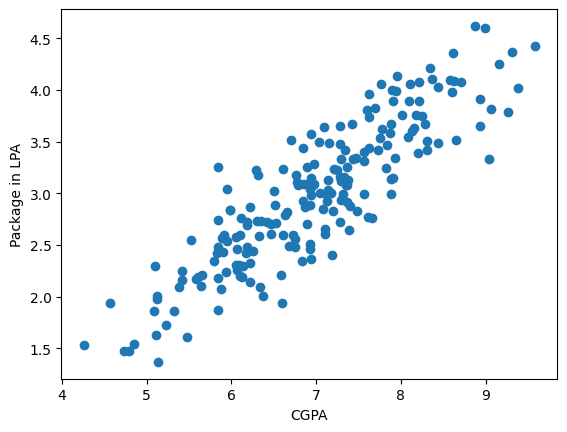

In [5]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [6]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [10]:
x_train

,cgpa
79,7.18
197,7.21
38,8.62
24,6.53
122,5.12
...,...
106,6.13
14,7.73
92,7.90
179,7.14


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.predict(x_test.iloc[0].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

In [15]:
m = lr.coef_

In [16]:
b = lr.intercept_

In [17]:
m * 6.63 + b

array([2.78031348])

Text(0, 0.5, 'Package(in lpa)')

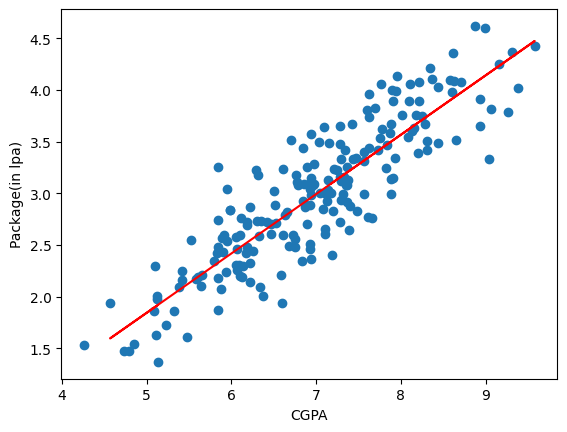

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [22]:
print("MSE",mean_squared_error(y_pred,y_test))

MSE 0.08417638361329663


In [23]:
print("MAE", mean_absolute_error(y_pred,y_test))

MAE 0.23150985393278384


In [24]:
print("MSE",np.sqrt(mean_squared_error(y_pred,y_test)))

MSE 0.2901316659954522


In [25]:
print("r2 score =", r2_score(y_pred,y_test))

r2 score = 0.7337973382944378


In [26]:
x_test.shape

(40, 1)

In [27]:
r2=r2_score(y_pred,y_test)

#Adjusted r2 score

n=40
k=1

Adjusted_r2 = 1 - (((1-r2)*(n-1))/(n-1-k))

In [28]:
print(Adjusted_r2)

0.7267920050916599
